<a href="https://colab.research.google.com/github/nerophung/neu-ai-class-winter-2019/blob/master/dog_cat_resnet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog & Cat Classification with ResNet

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-12-20 16:16:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   247MB/s    in 0.3s    

2019-12-20 16:16:35 (247 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



#### Extract data

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

#### Load data

In [25]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


#### Data Visualization

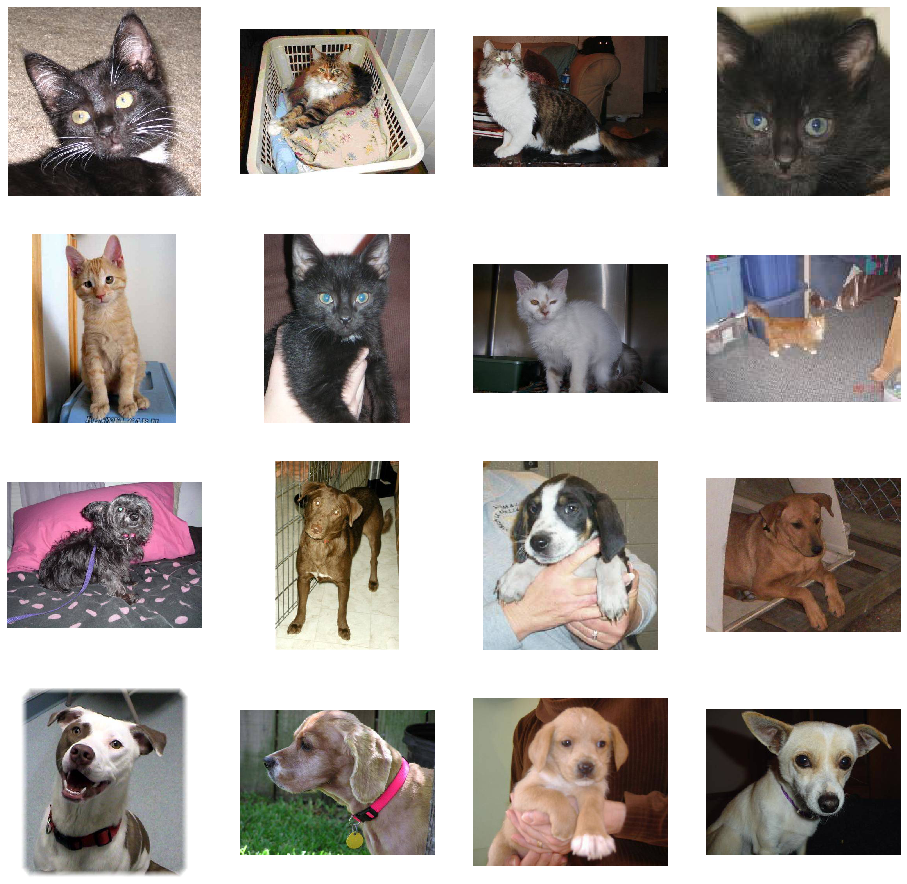

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### Build model

In [27]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(2, activation='softmax'))
model.layers[0].trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


#### Processing data

In [28]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# flow_From_directory generates batches of augmented data (where augmentation can be color conversion, etc)
# Both train & valid folders must have NUM_CLASSES sub-folders
train_generator = data_generator.flow_from_directory(
        '/tmp/cats_and_dogs_filtered/train',
        target_size=(image_size, image_size),
        batch_size=100,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/tmp/cats_and_dogs_filtered/validation',
        target_size=(image_size, image_size),
        batch_size=100,
        class_mode='categorical') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Training

In [30]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs = 10,
        validation_data=validation_generator,
        validation_steps=10
)

10/10 [==============================] - 447s 45s/step - loss: 0.0563 - acc: 0.9750 - val_loss: 0.0324 - val_acc: 0.9890


#### Test data

Found 1000 images belonging to 2 classes.
['cats/cat.2000.jpg', 'cats/cat.2001.jpg', 'cats/cat.2002.jpg', 'cats/cat.2003.jpg', 'cats/cat.2004.jpg', 'cats/cat.2005.jpg', 'cats/cat.2006.jpg', 'cats/cat.2007.jpg', 'cats/cat.2008.jpg', 'cats/cat.2009.jpg', 'cats/cat.2010.jpg', 'cats/cat.2011.jpg', 'cats/cat.2012.jpg', 'cats/cat.2013.jpg', 'cats/cat.2014.jpg', 'cats/cat.2015.jpg', 'cats/cat.2016.jpg', 'cats/cat.2017.jpg', 'cats/cat.2018.jpg', 'cats/cat.2019.jpg', 'cats/cat.2020.jpg', 'cats/cat.2021.jpg', 'cats/cat.2022.jpg', 'cats/cat.2023.jpg', 'cats/cat.2024.jpg', 'cats/cat.2025.jpg', 'cats/cat.2026.jpg', 'cats/cat.2027.jpg', 'cats/cat.2028.jpg', 'cats/cat.2029.jpg', 'cats/cat.2030.jpg', 'cats/cat.2031.jpg', 'cats/cat.2032.jpg', 'cats/cat.2033.jpg', 'cats/cat.2034.jpg', 'cats/cat.2035.jpg', 'cats/cat.2036.jpg', 'cats/cat.2037.jpg', 'cats/cat.2038.jpg', 'cats/cat.2039.jpg', 'cats/cat.2040.jpg', 'cats/cat.2041.jpg', 'cats/cat.2042.jpg', 'cats/cat.2043.jpg', 'cats/cat.2044.jpg', 'cats/cat.20

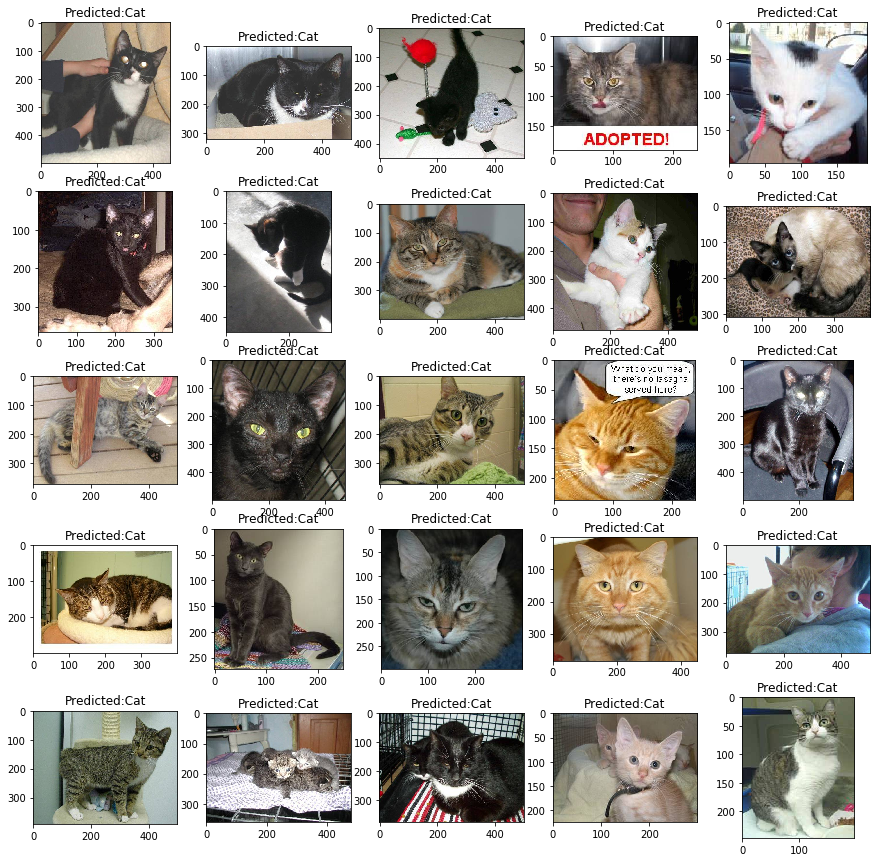

In [45]:
import numpy as np
import cv2 

test_generator = data_generator.flow_from_directory(
    directory = '/tmp/cats_and_dogs_filtered/validation',
    target_size = (image_size, image_size),
    batch_size = 25,
    class_mode = None,
    shuffle = False,
    seed = 123
)

filenames = test_generator.filenames

print(filenames)

test_generator.reset()

pred = model.predict_generator(test_generator, steps = 1, verbose = 1)

predicted_class_indices = np.argmax(pred, axis=1)

TEST_DIR = '/tmp/cats_and_dogs_filtered/validation/'
f, ax = plt.subplots(5, 5, figsize = (15, 15))

for i in range(0,25):
    imgBGR = cv2.imread(TEST_DIR + test_generator.filenames[i])
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    
    # a if condition else b
    predicted_class = "Dog" if predicted_class_indices[i] else "Cat"

    ax[i//5, i%5].imshow(imgRGB)
    ax[i//5, i%5].set_title("Predicted:{}".format(predicted_class))    

plt.show()